# Unweight and augment samples

Johann Brehmer, Kyle Cranmer, Marco Farina, Felix Kling, Duccio Pappadopulo, Josh Ruderman 2018

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import logging
import os

from madminer.sampling import SampleAugmenter
from madminer.sampling import multiple_benchmark_thetas
from madminer.sampling import constant_morphing_theta, multiple_morphing_thetas, random_morphing_thetas

logging.basicConfig(format="%(asctime)s %(levelname)s:    %(message)s", datefmt="%H:%M")


In [4]:
base_dir = '/Users/johannbrehmer/work/projects/madminer/diboson_mining/'
mg_dir = '/Users/johannbrehmer/work/projects/madminer/MG5_aMC_v2_6_4/'

In [5]:
sample_dir = base_dir + 'data/samples/wgamma/'
card_dir = base_dir + 'cards/wgamma/'
ufo_model_dir = card_dir + 'SMWgamma_UFO'
run_card_dir = card_dir + 'run_cards/'
mg_process_dir = base_dir + 'data/mg_processes/wgamma/'
log_dir = base_dir + 'logs/wgamma/'
temp_dir = base_dir + 'data/temp'
delphes_dir = mg_dir + 'Delphes'

## Load data (with tight cuts)

In [7]:
sa = SampleAugmenter(sample_dir + 'samples_tight.h5', debug=True)

07:44 INFO:    Loading data from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples_tight.h5
07:44 INFO:    Found 2 parameters:
07:44 INFO:       cWWW (LHA: dim6 1, maximal power in squared ME: (2,), range: (-0.02, 0.02))
07:44 INFO:       cWWWtilde (LHA: dim6 2, maximal power in squared ME: (2,), range: (-0.02, 0.02))
07:44 INFO:    Found 6 benchmarks, of which 6 physical:
07:44 INFO:       sm: cWWW = 0.00e+00, cWWWtilde = 0.00e+00
07:44 INFO:       morphing_basis_vector_1: cWWW = -6.07e-03, cWWWtilde = -1.84e-02
07:44 INFO:       morphing_basis_vector_2: cWWW = 1.00e-02, cWWWtilde = 1.70e-02
07:44 INFO:       morphing_basis_vector_3: cWWW = -1.99e-02, cWWWtilde = 1.87e-02
07:44 INFO:       morphing_basis_vector_4: cWWW = 1.97e-02, cWWWtilde = -1.53e-02
07:44 INFO:       morphing_basis_vector_5: cWWW = -1.65e-02, cWWWtilde = -6.33e-03
07:44 INFO:    Found 33 observables: et_miss, phi_miss, e_visible, eta_visible, e_l1, pt_l1, eta_l1, phi_l1, e_a1, p

### SALLY training data

In [13]:
for i in range(10):
    _, _, t_xz = sa.extract_samples_train_local(
        theta=constant_morphing_theta([0.,0.]),
        n_samples=1000000,
        folder=sample_dir + 'train_local_tight',
        filename='train_' + str(i),
        nuisance_score=False
    )

07:45 INFO:    Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
07:45 DEBUG:    Starting sample extraction
07:45 DEBUG:    Augmented data requested:
07:45 DEBUG:      ('score', 0)
07:45 WARNING:    No sampling information stored in file /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples_tight.h5
07:45 DEBUG:    Benchmark cross sections [pb]: [0.00038232 0.00743543 0.00770033 0.01437201 0.01198007 0.00622343]
07:45 DEBUG:    Drawing 1000000 events for the following thetas:
07:45 DEBUG:      theta 0 = [0. 0.] (sampling)
07:45 WARNING:    No sampling information stored in file /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples_tight.h5
07:45 DEBUG:      Cumulative probability (should be close to 1): 1.0000000000000087
07:45 INFO:    Effective number of samples: 18964.21301129083
07:45 INFO:    Extracting training sample for local score regress

07:45 DEBUG:      Cumulative probability (should be close to 1): 1.0000000000000087
07:45 INFO:    Effective number of samples: 18964.21301129083
07:46 INFO:    Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
07:46 DEBUG:    Starting sample extraction
07:46 DEBUG:    Augmented data requested:
07:46 DEBUG:      ('score', 0)
07:46 WARNING:    No sampling information stored in file /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples_tight.h5
07:46 DEBUG:    Benchmark cross sections [pb]: [0.00038232 0.00743543 0.00770033 0.01437201 0.01198007 0.00622343]
07:46 DEBUG:    Drawing 1000000 events for the following thetas:
07:46 DEBUG:      theta 0 = [0. 0.] (sampling)
07:46 WARNING:    No sampling information stored in file /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples_tight.h5
07:46 DEBUG:      Cumulative probability (should be close to 1): 

### RASCAL training data

In [ ]:
for i in range(1):
    _ = sa.extract_samples_train_ratio(
        theta0=random_morphing_thetas(1000, [('gaussian', 0., 0.005), ('gaussian', 0., 0.005)]),
        theta1=constant_morphing_theta([0.,0.]),
        n_samples=100000,
        folder=sample_dir + 'train_ratio_tight',
        filename='train_' + str(i)
    )

### SCANDAL training data

In [ ]:
for i in range(1):
    sa.extract_samples_train_global(
        theta=random_morphing_thetas(10000, [('gaussian', 0., 0.005), ('gaussian', 0., 0.005)]),
        n_samples=100000,
        folder=sample_dir + 'train_scandal_tight',
        filename='train_' + str(i)
    )

### Validation and test data

In [14]:
_, _ = sa.extract_samples_train_plain(
    theta=constant_morphing_theta([0.,0.]),
    n_samples=1000000,
    folder=sample_dir + 'validation_tight',
    filename='validation'
)

07:46 INFO:    Extracting plain training sample. Sampling according to ('theta', array([0., 0.]))
07:46 DEBUG:    Starting sample extraction
07:46 DEBUG:    Augmented data requested:
07:46 WARNING:    No sampling information stored in file /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples_tight.h5
07:46 DEBUG:    Benchmark cross sections [pb]: [0.00038232 0.00743543 0.00770033 0.01437201 0.01198007 0.00622343]
07:46 DEBUG:    Drawing 1000000 events for the following thetas:
07:46 DEBUG:      theta 0 = [0. 0.] (sampling)
07:46 WARNING:    No sampling information stored in file /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples_tight.h5
07:46 DEBUG:      Cumulative probability (should be close to 1): 1.0000000000000087
07:46 INFO:    Effective number of samples: 18964.21301129083


In [15]:
x_sm, _ = sa.extract_samples_test(
    theta=constant_morphing_theta([0.,0.]),
    n_samples=1000000,
    folder=sample_dir + 'test_tight',
    filename='test'
)

07:46 INFO:    Extracting evaluation sample. Sampling according to ('theta', array([0., 0.]))
07:46 DEBUG:    Starting sample extraction
07:46 DEBUG:    Augmented data requested:
07:46 WARNING:    No sampling information stored in file /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples_tight.h5
07:46 DEBUG:    Benchmark cross sections [pb]: [0.00038193 0.00750717 0.0077768  0.01451579 0.01210051 0.00628234]
07:46 DEBUG:    Drawing 1000000 events for the following thetas:
07:46 DEBUG:      theta 0 = [0. 0.] (sampling)
07:46 WARNING:    No sampling information stored in file /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples_tight.h5
07:46 DEBUG:      Cumulative probability (should be close to 1): 1.0000000000008509
07:46 INFO:    Effective number of samples: 18944.950515684195


### xsec test

In [16]:
thetas_benchmarks, xsecs_benchmarks, xsec_errors_benchmarks = sa.extract_cross_sections(
    theta=multiple_benchmark_thetas(['sm', 'morphing_basis_vector_1', 'morphing_basis_vector_2', 'morphing_basis_vector_3', 'morphing_basis_vector_4', 'morphing_basis_vector_5'])
)

thetas_morphing, xsecs_morphing, xsec_errors_morphing = sa.extract_cross_sections(
    theta=random_morphing_thetas(1000, [('gaussian', 0., 0.02), ('gaussian', 0., 0.02)])
)

07:46 INFO:    Starting cross-section calculation
07:46 DEBUG:    theta [0. 0.]: xsec = (0.0007642437474402438 +/- 2.044803284408722e-06) pb
07:46 DEBUG:    theta [-0.00607012 -0.01844531]: xsec = (0.014942766707125556 +/- 0.00016625438688196913) pb
07:46 DEBUG:    theta [0.0100254  0.01704872]: xsec = (0.015477304598613607 +/- 0.00017257264481866346) pb
07:46 DEBUG:    theta [-0.01993929  0.01871265]: xsec = (0.028888113560249208 +/- 0.0003298106550051068) pb
07:46 DEBUG:    theta [ 0.01966492 -0.01527599]: xsec = (0.02408083598568897 +/- 0.00027321383826180596) pb
07:46 DEBUG:    theta [-0.01649806 -0.00632778]: xsec = (0.012505905782306172 +/- 0.00013779127069065138) pb
07:46 INFO:    Starting cross-section calculation
07:46 DEBUG:    Total n_samples: 1, n_benchmarks: 1000, n_samples_per_theta: 0
07:46 DEBUG:    theta [ 0.01769842 -0.00107106]: xsec = (0.012586824617865342 +/- 0.0002528046942984723) pb
07:46 DEBUG:    theta [0.05874718 0.02309476]: xsec = (0.1506178123683825 +/- 0.0

07:46 DEBUG:    theta [0.00394838 0.02804481]: xsec = (0.030933275520237485 +/- 0.00037470722009732757) pb
07:46 DEBUG:    theta [0.01508793 0.02818099]: xsec = (0.03919592096161013 +/- 0.00037533840031931813) pb
07:46 DEBUG:    theta [-0.03751641  0.02759143]: xsec = (0.08233146753534579 +/- 0.000751027743164159) pb
07:46 DEBUG:    theta [-0.01784771  0.03896576]: xsec = (0.06985067169037422 +/- 0.0009057019513987488) pb
07:46 DEBUG:    theta [ 6.84859069e-05 -6.04424882e-03]: xsec = (0.002137489156645154 +/- 3.7944733021633756e-05) pb
07:46 DEBUG:    theta [0.00629083 0.01234794]: xsec = (0.007988239910389156 +/- 0.00010134407621246163) pb
07:46 DEBUG:    theta [-0.00296648  0.01619207]: xsec = (0.010957648887707236 +/- 0.0001779986561316289) pb
07:46 DEBUG:    theta [0.00182434 0.02580363]: xsec = (0.025933228567962242 +/- 0.000335757385374937) pb
07:46 DEBUG:    theta [0.01952654 0.00677219]: xsec = (0.01682878746267779 +/- 0.0003203483076546546) pb
07:46 DEBUG:    theta [-0.003877

07:46 DEBUG:    theta [ 0.01202476 -0.03444771]: xsec = (0.050823982944438975 +/- 0.0005870829045264684) pb
07:46 DEBUG:    theta [ 0.013818   -0.00971826]: xsec = (0.011495083087093017 +/- 0.00016361326671203829) pb
07:46 DEBUG:    theta [ 0.00496483 -0.00165084]: xsec = (0.0017933920533818955 +/- 4.5924097876560084e-05) pb
07:46 DEBUG:    theta [ 0.00524416 -0.0427871 ]: xsec = (0.07064214836274896 +/- 0.0008505250198045922) pb
07:46 DEBUG:    theta [-0.03832294 -0.0144049 ]: xsec = (0.06379933196631328 +/- 0.0007476726290618986) pb
07:46 DEBUG:    theta [0.02590917 0.00494208]: xsec = (0.026928351433819487 +/- 0.0004998763710672644) pb
07:46 DEBUG:    theta [0.01023215 0.01243498]: xsec = (0.010518388442862705 +/- 0.00014090199772526764) pb
07:46 DEBUG:    theta [-0.02581595 -0.02678258]: xsec = (0.05280157700945827 +/- 0.00044463782009854924) pb
07:46 DEBUG:    theta [0.00148727 0.01625716]: xsec = (0.010789215771930325 +/- 0.00015332284168047153) pb
07:46 DEBUG:    theta [ 0.02701

07:46 DEBUG:    theta [-0.00293157 -0.00486878]: xsec = (0.0019783282012502323 +/- 3.166122386233223e-05) pb
07:46 DEBUG:    theta [-0.01736058 -0.01416114]: xsec = (0.019639040894223837 +/- 0.00018192804717320356) pb
07:46 DEBUG:    theta [0.00520398 0.0066141 ]: xsec = (0.0034287166822628153 +/- 5.8037427662786966e-05) pb
07:46 DEBUG:    theta [ 0.00251577 -0.02834383]: xsec = (0.031211221696624943 +/- 0.00038357220864303627) pb
07:46 DEBUG:    theta [7.02972147e-03 9.89330027e-05]: xsec = (0.002622912604157897 +/- 6.895757806943425e-05) pb
07:46 DEBUG:    theta [-0.01952703  0.00992123]: xsec = (0.01880789566567342 +/- 0.00020595074507068467) pb
07:46 DEBUG:    theta [-0.01267562  0.02130605]: xsec = (0.023881964178836826 +/- 0.00033486813057490136) pb
07:46 DEBUG:    theta [-0.02833808  0.01845008]: xsec = (0.0437701752820539 +/- 0.0004222308153050051) pb
07:46 DEBUG:    theta [-2.34796234e-03 -8.37864112e-06]: xsec = (0.0009716321205637448 +/- 1.620369134715898e-05) pb
07:46 DEBUG

07:46 DEBUG:    theta [0.02814718 0.01079313]: xsec = (0.03494129989449285 +/- 0.0005994212587400087) pb
07:46 DEBUG:    theta [-0.01416148 -0.02002314]: xsec = (0.02338183864974411 +/- 0.00020300963496957936) pb
07:46 DEBUG:    theta [-0.00073208 -0.0338322 ]: xsec = (0.04382611240083927 +/- 0.0005196539000287221) pb
07:46 DEBUG:    theta [-0.00433998  0.03031247]: xsec = (0.036032647099984716 +/- 0.0005033399869351746) pb
07:46 DEBUG:    theta [-0.01392699  0.0273587 ]: xsec = (0.03621217899744869 +/- 0.0004925989734254221) pb
07:46 DEBUG:    theta [ 0.01241445 -0.01119851]: xsec = (0.011274668138200486 +/- 0.00014861718753464236) pb
07:46 DEBUG:    theta [-0.01008266  0.00762939]: xsec = (0.00677782315153373 +/- 0.00010767194907388803) pb
07:46 DEBUG:    theta [-0.00113757 -0.01298385]: xsec = (0.007151032135630103 +/- 9.988983220671721e-05) pb
07:46 DEBUG:    theta [-0.00357248 -0.00449631]: xsec = (0.002003981096689562 +/- 3.133743058036134e-05) pb
07:46 DEBUG:    theta [-0.014800

07:46 DEBUG:    theta [ 0.03247373 -0.02287622]: xsec = (0.060100126135211214 +/- 0.0006025433597531938) pb
07:46 DEBUG:    theta [-0.00685024 -0.02304252]: xsec = (0.022494043586312927 +/- 0.00024138531320097014) pb
07:46 DEBUG:    theta [0.04083939 0.01807603]: xsec = (0.07577811274434886 +/- 0.0011783771005600392) pb
07:46 DEBUG:    theta [-0.00338368 -0.022459  ]: xsec = (0.02016134036325022 +/- 0.0002382510486297212) pb
07:46 DEBUG:    theta [-0.00638477  0.00500253]: xsec = (0.003239335873693742 +/- 6.524532896158097e-05) pb
07:46 DEBUG:    theta [-0.02790504  0.01494869]: xsec = (0.03845579155422725 +/- 0.00037265706807939594) pb
07:46 DEBUG:    theta [-0.02586221  0.00517726]: xsec = (0.02692772510498523 +/- 0.00028998445249524984) pb
07:46 DEBUG:    theta [-0.01831481 -0.00026961]: xsec = (0.013382238417821875 +/- 0.0001558374116496721) pb
07:46 DEBUG:    theta [-0.02506178 -0.01051909]: xsec = (0.028545886783612244 +/- 0.0003138301468146589) pb
07:46 DEBUG:    theta [0.022303

07:46 DEBUG:    theta [-0.01709731  0.00927329]: xsec = (0.014993422799918638 +/- 0.0001748665170185916) pb
07:46 DEBUG:    theta [ 0.02471831 -0.00522797]: xsec = (0.024768910625312585 +/- 0.00041419502731879514) pb
07:46 DEBUG:    theta [-0.02980796  0.04284945]: xsec = (0.10323659496982479 +/- 0.0011645874612588104) pb
07:46 DEBUG:    theta [-0.00223634  0.03248456]: xsec = (0.04064234811966099 +/- 0.0005484894370602136) pb
07:46 DEBUG:    theta [ 0.01271735 -0.00765489]: xsec = (0.009048899711213459 +/- 0.00014563739066328528) pb
07:46 DEBUG:    theta [ 0.0075612  -0.01353645]: xsec = (0.009803320272844111 +/- 0.00012632818639532383) pb
07:46 DEBUG:    theta [-0.0056436  -0.00377183]: xsec = (0.002496703123447563 +/- 3.665684852389072e-05) pb
07:46 DEBUG:    theta [-0.03206647 -0.03835869]: xsec = (0.09476571343816767 +/- 0.0007662548682269513) pb
07:46 DEBUG:    theta [-0.01330478  0.0025964 ]: xsec = (0.007675681027959465 +/- 9.956882857622969e-05) pb
07:46 DEBUG:    theta [0.017

07:46 DEBUG:    theta [-0.01504991  0.01917553]: xsec = (0.02311384539501261 +/- 0.0003046013517892052) pb
07:46 DEBUG:    theta [0.00510476 0.01662465]: xsec = (0.012140445617736962 +/- 0.00014738122135077774) pb
07:46 DEBUG:    theta [0.01414559 0.00268727]: xsec = (0.008561072838737825 +/- 0.00018728692228903862) pb
07:46 DEBUG:    theta [-0.01179795 -0.01162977]: xsec = (0.011084084515802114 +/- 0.00010713088536415105) pb
07:46 DEBUG:    theta [ 0.01818542 -0.02294108]: xsec = (0.03299048413042362 +/- 0.0003305768902825509) pb
07:46 DEBUG:    theta [-2.49719681e-02 -6.67117127e-05]: xsec = (0.024217176405496615 +/- 0.00027757442382196195) pb
07:46 DEBUG:    theta [-0.0237887   0.01083376]: xsec = (0.026462684417087913 +/- 0.00027030467864169586) pb
07:46 DEBUG:    theta [-0.02519236  0.00929042]: xsec = (0.027880103753672975 +/- 0.0002852244275688997) pb
07:46 DEBUG:    theta [ 0.01040383 -0.02202718]: xsec = (0.023078662072593382 +/- 0.00026446057443056014) pb
07:46 DEBUG:    thet

07:46 DEBUG:    theta [-0.02613282  0.01937313]: xsec = (0.04056569350128871 +/- 0.0004054855521059473) pb
07:46 DEBUG:    theta [-0.00877045  0.01318057]: xsec = (0.010192620396270571 +/- 0.00016567324309799166) pb
07:46 DEBUG:    theta [ 0.02470628 -0.01023851]: xsec = (0.027660265050432446 +/- 0.00039085797096588743) pb
07:46 DEBUG:    theta [-0.02460901 -0.01216081]: xsec = (0.02910015949705608 +/- 0.0003098908806105221) pb
07:46 DEBUG:    theta [-0.00901121 -0.00195082]: xsec = (0.003961136872225709 +/- 5.520832514661185e-05) pb
07:46 DEBUG:    theta [ 0.00659177 -0.01625034]: xsec = (0.012327101318384341 +/- 0.00015608201137331843) pb
07:46 DEBUG:    theta [0.01479263 0.02037424]: xsec = (0.024607474365069642 +/- 0.0002668016235838998) pb
07:46 DEBUG:    theta [-0.01232574  0.0118863 ]: xsec = (0.011793102195675469 +/- 0.00016802339371737587) pb
07:46 DEBUG:    theta [0.01012675 0.01779794]: xsec = (0.01653607927037026 +/- 0.00018123686805428992) pb
07:46 DEBUG:    theta [-0.0262

07:46 DEBUG:    theta [ 0.03364595 -0.01222262]: xsec = (0.04895383605360852 +/- 0.0006608417604512317) pb
07:46 DEBUG:    theta [0.03694991 0.01136174]: xsec = (0.05696536492945128 +/- 0.0009566093109007364) pb
07:46 DEBUG:    theta [-0.02387901 -0.00411973]: xsec = (0.02284674848018889 +/- 0.00026458023051616935) pb
07:46 DEBUG:    theta [-0.00187084  0.00873863]: xsec = (0.0037690071805493654 +/- 7.431002308591485e-05) pb
07:46 DEBUG:    theta [-0.03443345 -0.00750589]: xsec = (0.04747288544329707 +/- 0.0005688500599159142) pb
07:46 DEBUG:    theta [0.03041934 0.00024702]: xsec = (0.03556563049406707 +/- 0.0006284707878561228) pb
07:46 DEBUG:    theta [-0.0157777   0.01733027]: xsec = (0.0214240154657758 +/- 0.00027404779814227734) pb
07:46 DEBUG:    theta [-0.03638825 -0.00693917]: xsec = (0.05237163434262055 +/- 0.0006328319637560869) pb
07:46 DEBUG:    theta [ 0.03449071 -0.0124128 ]: xsec = (0.0512946536643633 +/- 0.0006902156791189128) pb
07:46 DEBUG:    theta [-0.02517339 -0.0

07:46 DEBUG:    theta [-0.03157006  0.01357652]: xsec = (0.0451813113954571 +/- 0.00043624425225198836) pb
07:46 DEBUG:    theta [-0.00312187 -0.00189244]: xsec = (0.0012652701075084104 +/- 2.068680515995083e-05) pb
07:46 DEBUG:    theta [-0.00457027  0.00846784]: xsec = (0.004247707334524273 +/- 8.572424901726714e-05) pb
07:46 DEBUG:    theta [-0.02376059  0.00156787]: xsec = (0.02208953485510128 +/- 0.0002493469343407642) pb
07:46 DEBUG:    theta [ 0.02081086 -0.03307261]: xsec = (0.05818190300690357 +/- 0.0005867205303223799) pb
07:46 DEBUG:    theta [-0.018307    0.02890507]: xsec = (0.044794199035601855 +/- 0.0005661926283400189) pb
07:46 DEBUG:    theta [-0.02465689 -0.00907446]: xsec = (0.02672451137896059 +/- 0.0002987053640461905) pb
07:46 DEBUG:    theta [-0.00998251 -0.02294103]: xsec = (0.024301488019047003 +/- 0.0002360711685259813) pb
07:46 DEBUG:    theta [-0.02955849  0.02932524]: xsec = (0.06596862530754721 +/- 0.0006739122257367535) pb
07:46 DEBUG:    theta [ 0.013240

07:46 DEBUG:    theta [-0.01663135 -0.00750234]: xsec = (0.013282731351677103 +/- 0.0001427574034950798) pb
07:46 DEBUG:    theta [ 0.00467675 -0.00256522]: xsec = (0.0018337933820711486 +/- 4.446802733710218e-05) pb
07:46 DEBUG:    theta [ 0.00073389 -0.02008041]: xsec = (0.01594594520518726 +/- 0.00020439749158790256) pb
07:46 DEBUG:    theta [-0.00279859 -0.00920169]: xsec = (0.0042418527303514815 +/- 6.18118606655042e-05) pb
07:46 DEBUG:    theta [-0.0079611  -0.02948979]: xsec = (0.03584930475439175 +/- 0.00037493369631434167) pb
07:46 DEBUG:    theta [ 0.01195033 -0.01304083]: xsec = (0.012528577108004441 +/- 0.00015350751294697474) pb
07:46 DEBUG:    theta [0.00437323 0.03853812]: xsec = (0.057343264029391716 +/- 0.0006798069870776243) pb
07:46 DEBUG:    theta [-2.04263756e-03 -5.09576560e-05]: xsec = (0.0009212981957947926 +/- 1.4177657458398993e-05) pb
07:46 DEBUG:    theta [ 0.00454429 -0.02312049]: xsec = (0.021640960539504164 +/- 0.00027029584209651815) pb
07:46 DEBUG:    t

07:46 DEBUG:    theta [-0.03240062 -0.01606365]: xsec = (0.04994773234704591 +/- 0.0005463399588299249) pb
07:46 DEBUG:    theta [0.00780272 0.00881605]: xsec = (0.00597791637633191 +/- 9.346270130678003e-05) pb
07:46 DEBUG:    theta [0.02313647 0.00182801]: xsec = (0.021020878024409228 +/- 0.0004024441322458943) pb
07:46 DEBUG:    theta [ 0.01953153 -0.00325185]: xsec = (0.015507617007417929 +/- 0.00028758181759375374) pb
07:46 DEBUG:    theta [-0.02988331 -0.00070004]: xsec = (0.03436748903942724 +/- 0.0003994964729410158) pb
07:46 DEBUG:    theta [0.03918347 0.00045146]: xsec = (0.05851184075815699 +/- 0.0009823228994656626) pb
07:46 DEBUG:    theta [-0.00055156  0.01028285]: xsec = (0.004753670453886076 +/- 8.433161755394941e-05) pb
07:46 DEBUG:    theta [-0.02250987  0.02256038]: xsec = (0.03896480988230747 +/- 0.0004310820289794441) pb
07:46 DEBUG:    theta [0.00705277 0.05047626]: xsec = (0.09846072601398705 +/- 0.0011168945577487233) pb
07:46 DEBUG:    theta [ 0.0127907  -0.004

07:46 DEBUG:    theta [ 0.01523488 -0.01857271]: xsec = (0.022462677624144427 +/- 0.0002383864167654496) pb
07:46 DEBUG:    theta [-0.02586242  0.00705391]: xsec = (0.027791643800768543 +/- 0.00029152096565229497) pb
07:46 DEBUG:    theta [0.02385772 0.02696216]: xsec = (0.049512662211171725 +/- 0.0005336935729863477) pb
07:46 DEBUG:    theta [-0.00329797 -0.00040501]: xsec = (0.0011794821316407557 +/- 2.1419516156933197e-05) pb
07:46 DEBUG:    theta [-0.00633325  0.01442655]: xsec = (0.010101991854453546 +/- 0.00017040026940943066) pb
07:46 DEBUG:    theta [-0.0054104   0.01237856]: xsec = (0.007629564636489362 +/- 0.00013604979582942852) pb
07:46 DEBUG:    theta [ 0.01649198 -0.01917212]: xsec = (0.02481336652454656 +/- 0.000258474480833416) pb
07:46 DEBUG:    theta [ 0.00699531 -0.00644684]: xsec = (0.004166517644370224 +/- 7.512404008852216e-05) pb
07:46 DEBUG:    theta [ 0.02291354 -0.01721302]: xsec = (0.03164915427487663 +/- 0.00034346768065265156) pb


07:46 DEBUG:    locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x112763dd8>
07:46 DEBUG:    Using auto colorbar locator on colorbar
07:46 DEBUG:    locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x112763dd8>
07:46 DEBUG:    Setting pcolormesh
07:46 DEBUG:    findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000.
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos


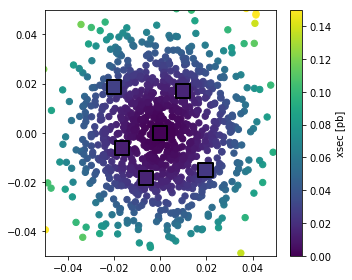

In [17]:
cmin, cmax = 0., 0.15

fig = plt.figure(figsize=(5,4))

sc = plt.scatter(thetas_morphing[:,0], thetas_morphing[:,1], c=xsecs_morphing,
            s=40., cmap='viridis', vmin=cmin, vmax=cmax,
            marker='o')

plt.scatter(thetas_benchmarks[:,0], thetas_benchmarks[:,1], c=xsecs_benchmarks,
            s=200., cmap='viridis', vmin=cmin, vmax=cmax,lw=2., edgecolor='black',
            marker='s')

cb = plt.colorbar(sc)
cb.set_label('xsec [pb]')

plt.xlim(-0.05,.05)
plt.ylim(-0.05,.05)
plt.tight_layout()
plt.show()

### Observable distributions

In [18]:
x_bsm1, _ = sa.extract_samples_test(
    theta=constant_morphing_theta([0.008,0.]),
    n_samples=1000000,
    folder=None,
    filename=None
)

x_bsm2, _ = sa.extract_samples_test(
    theta=constant_morphing_theta([0.,0.008]),
    n_samples=1000000,
    folder=None,
    filename=None
)

07:46 INFO:    Extracting evaluation sample. Sampling according to ('theta', array([0.008, 0.   ]))
07:46 DEBUG:    Starting sample extraction
07:46 DEBUG:    Augmented data requested:
07:46 WARNING:    No sampling information stored in file /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples_tight.h5
07:46 DEBUG:    Benchmark cross sections [pb]: [0.00038193 0.00750717 0.0077768  0.01451579 0.01210051 0.00628234]
07:46 DEBUG:    Drawing 1000000 events for the following thetas:
07:46 DEBUG:      theta 0 = [0.008 0.   ] (sampling)
07:46 WARNING:    No sampling information stored in file /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples_tight.h5
07:46 DEBUG:      Cumulative probability (should be close to 1): 1.0000000000000926
07:46 INFO:    Effective number of samples: 115.64824690243121
07:46 INFO:    Extracting evaluation sample. Sampling according to ('theta', array([0.   , 0.008]))
07:46 DEBUG:    Starting samp

07:46 DEBUG:    update_title_pos
07:46 DEBUG:    findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXGeneral ('/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf') with score of 0.050000.
07:46 DEBUG:    findfont: Matching :family=STIXGeneral:style=italic:variant=normal:weight=normal:stretch=normal:size=10.0 to STIXGeneral ('/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralItalic.ttf') with score of 0.050000.
07:46 DEBUG:    findfont: Matching :family=STIXGeneral:style=normal:variant=normal:weight=bold:stretch=normal:size=10.0 to STIXGeneral ('/Users/johannbrehmer/anaconda3/envs/higgs_inference/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf') with score of 0.000000.
07:46 DEBUG:    findfont: Matching :family=STIXNonUnicode:style=normal:variant=normal:w

07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBUG:    update_title_pos
07:46 DEBU

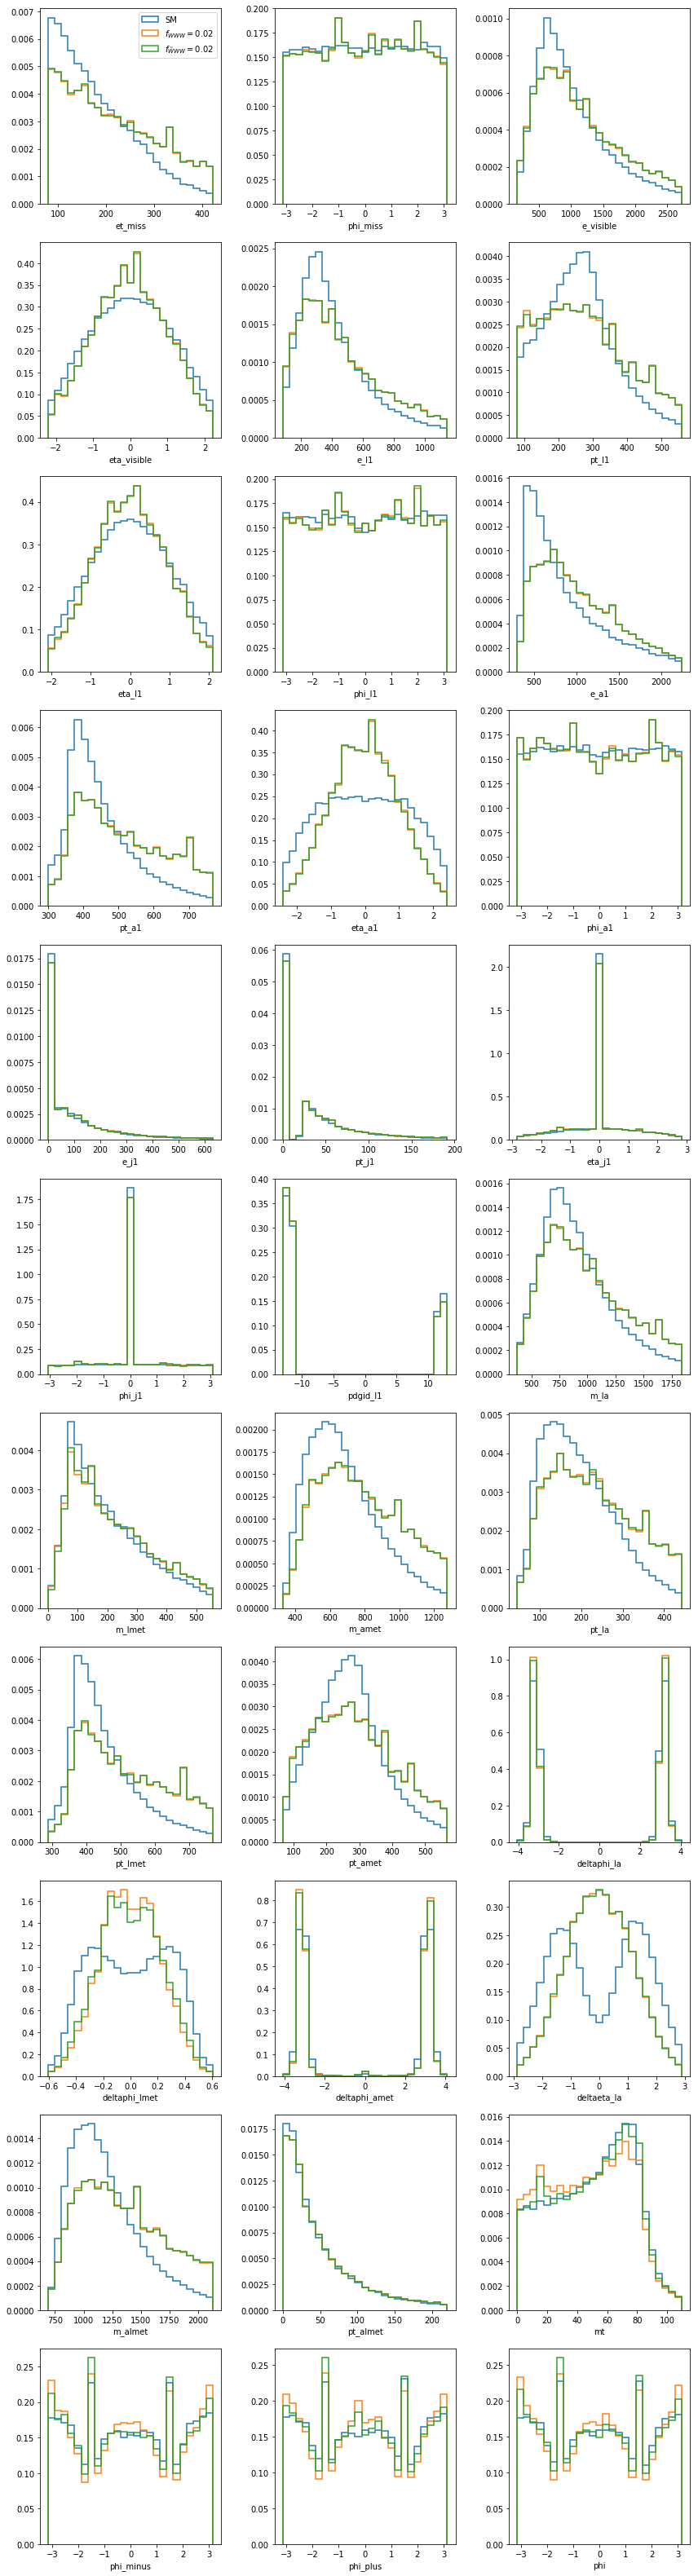

In [19]:
bins = 25
n_observables = x_sm.shape[1]
n_cols = 3
n_rows = (n_observables + n_cols - 1) // n_cols
labels = sa.observables.keys()

plt.figure(figsize=(4. * n_cols, 4. * n_rows))

for i, label in enumerate(labels):
    xmin = np.percentile(x_sm[:,i], 5.)
    xmax = np.percentile(x_sm[:,i], 95.)
    xwidth = xmax - xmin
    xmin -= xwidth * 0.1
    xmax += xwidth * 0.1
    xmin = max(xmin, np.min(x_sm[:,i]))
    xmax = min(xmax, np.max(x_sm[:,i]))
    x_range = (xmin, xmax)
    
    ax = plt.subplot(n_rows, n_cols, i+1)
       
    plt.hist(x_sm[:,i], histtype='step', range=x_range, bins=bins, lw=1.5, label=r'SM', density=True) 
    plt.hist(x_bsm1[:,i], histtype='step', range=x_range, bins=bins, lw=1.5, label=r'$f_{WWW} = 0.02$', density=True)
    plt.hist(x_bsm2[:,i], histtype='step', range=x_range, bins=bins, lw=1.5, label=r'$f_{\tilde{W}WW} = 0.02$', density=True) 
    
    if i == 0:
        plt.legend()
        
    plt.xlabel(label)
    
plt.tight_layout()
plt.savefig('../../figures/wgamma/observables.pdf')

## Same without cuts

In [20]:
sa_all = SampleAugmenter(sample_dir + 'samples.h5', debug=False)

07:46 INFO:    Loading data from /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples.h5
07:46 INFO:    Found 2 parameters:
07:46 INFO:       cWWW (LHA: dim6 1, maximal power in squared ME: (2,), range: (-0.02, 0.02))
07:46 INFO:       cWWWtilde (LHA: dim6 2, maximal power in squared ME: (2,), range: (-0.02, 0.02))
07:46 INFO:    Found 6 benchmarks, of which 6 physical:
07:46 INFO:       sm: cWWW = 0.00e+00, cWWWtilde = 0.00e+00
07:46 INFO:       morphing_basis_vector_1: cWWW = -6.07e-03, cWWWtilde = -1.84e-02
07:46 INFO:       morphing_basis_vector_2: cWWW = 1.00e-02, cWWWtilde = 1.70e-02
07:46 INFO:       morphing_basis_vector_3: cWWW = -1.99e-02, cWWWtilde = 1.87e-02
07:46 INFO:       morphing_basis_vector_4: cWWW = 1.97e-02, cWWWtilde = -1.53e-02
07:46 INFO:       morphing_basis_vector_5: cWWW = -1.65e-02, cWWWtilde = -6.33e-03
07:46 INFO:    Found 33 observables: et_miss, phi_miss, e_visible, eta_visible, e_l1, pt_l1, eta_l1, phi_l1, e_a1, pt_a1, 

### SALLY training data

In [21]:
for i in range(10):
    _, _, _ = sa_all.extract_samples_train_local(
        theta=constant_morphing_theta([0.,0.]),
        n_samples=1000000,
        folder=sample_dir + 'train_local',
        filename='train_' + str(i)
    )

07:46 INFO:    Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
07:46 WARNING:    No sampling information stored in file /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples.h5
07:46 WARNING:    Warning: large statistical uncertainty on the total cross section for theta = [0. 0.]: (0.010257024688578802 +/- 0.003002933487780324) pb
07:46 WARNING:    No sampling information stored in file /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples.h5
07:46 INFO:    Effective number of samples: 8.30225803438326
07:46 INFO:    Extracting training sample for local score regression. Sampling and score evaluation according to ('theta', array([0., 0.]))
07:46 WARNING:    No sampling information stored in file /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples.h5
07:46 WARNING:    Warning: large statistical uncertainty on th

### RASCAL training data

In [ ]:
for i in range(10):
    _ = sa_all.extract_samples_train_ratio(
        theta0=random_morphing_thetas(1000, [('gaussian', 0., 0.005), ('gaussian', 0., 0.005)]),
        theta1=constant_morphing_theta([0.,0.]),
        n_samples=100000,
        folder=sample_dir + 'train_ratio',
        filename='train_' + str(i)
    )

### SCANDAL training data

In [ ]:
for i in range(1):
    _, _, _ = sa_all.extract_samples_train_global(
        theta=random_morphing_thetas(10000, [('gaussian', 0., 0.005), ('gaussian', 0., 0.005)]),
        n_samples=100000,
        folder=sample_dir + 'train_scandal',
        filename='train_' + str(i)
    )

### Validation and test data

In [22]:
_, _ = sa_all.extract_samples_train_plain(
    theta=constant_morphing_theta([0.,0.]),
    n_samples=1000000,
    folder=sample_dir + 'validation',
    filename='validation'
)

07:47 INFO:    Extracting plain training sample. Sampling according to ('theta', array([0., 0.]))
07:47 WARNING:    No sampling information stored in file /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples.h5
07:47 WARNING:    Warning: large statistical uncertainty on the total cross section for theta = [0. 0.]: (0.010257024688578802 +/- 0.003002933487780324) pb
07:47 WARNING:    No sampling information stored in file /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples.h5
07:47 INFO:    Effective number of samples: 8.30225803438326


In [23]:
_, _ = sa_all.extract_samples_test(
    theta=constant_morphing_theta([0.,0.]),
    n_samples=1000000,
    folder=sample_dir + 'test',
    filename='test'
)

07:47 INFO:    Extracting evaluation sample. Sampling according to ('theta', array([0., 0.]))
07:47 WARNING:    No sampling information stored in file /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples.h5
07:47 WARNING:    Warning: large statistical uncertainty on the total cross section for theta = [0. 0.]: (0.012647552637360103 +/- 0.003463402763909234) pb
07:47 WARNING:    No sampling information stored in file /Users/johannbrehmer/work/projects/madminer/diboson_mining/data/samples/wgamma/samples.h5
07:47 INFO:    Effective number of samples: 10.237203154607714
